# Data Wrangling

Data for this project is obtained from Inside Airbnb website: http://insideairbnb.com/get-the-data.html. 

Inside Airbnb contains data that is scraped from Airbnb website. Data is scraped at different time points for various locations such as New York, Boston and San Francisco. More data can be found at the archive section as well. 

This dataset contains information for San Francisco and our aim is to create a model that will help airbnb owners to list their units for the optimum price. We will use two csv files in this project:

**listings_detailed.csv:** Detailed information for each listing found on Airbnb website in San Francisco at the time of scraping.

**calendar.csv:**  Pricing information for each listing for the coming year.

In [1]:
# Importing necessary libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
%matplotlib inline

In [2]:
# Loading the data.
df = pd.read_csv('../data/raw/listings_detailed.csv',index_col='id')
calendar = pd.read_csv('../data/raw/calendar.csv')

In [3]:
rows1, columns1 = df.shape
rows2, columns2 = calendar.shape

print ('The listing data frame has ', rows1,' rows and ',columns1,' columns.')
print ('The calendar data frame has ', rows2,' rows and ',columns2,' columns.')

The listing data frame has  6883  rows and  73  columns.
The calendar data frame has  2512295  rows and  7  columns.


In [4]:
# Getting a glance at all columns of the data frame
pd.set_option('display.max_columns', len(df.columns)) 
df.head(5)

,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
958,https://www.airbnb.com/rooms/958,20210301171847,2021-03-02,"Bright, Modern Garden Unit - 1BR/1BTH",San Francisco: Out of state visitors are not a...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,Holly,2008-07-31,"San Francisco, California, United States",We are a family of four that live upstairs. W...,within an hour,90%,90%,t,https://a0.muscache.com/im/pictures/user/efdad...,https://a0.muscache.com/im/pictures/user/efdad...,Duboce Triangle,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"San Francisco, California, United States",Western Addition,NaN,37.77028,-122.43317,Entire apartment,Entire home/apt,3,NaN,1 bath,1.0,2.0,"[""Hangers"", ""Essentials"", ""Oven"", ""Free street...",$130.00,2,30,2,2,1125,1125,2.0,1125.0,NaN,t,0,10,15,137,2021-03-02,276,38,1,2009-07-23,2021-02-07,97.0,10.0,10.0,10.0,10.0,10.0,10.0,STR-0001256,f,1,1,0,0,1.95
5858,https://www.airbnb.com/rooms/5858,20210301171847,2021-03-02,Creative Sanctuary,<b>The space</b><br />We live in a large Victo...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,https://www.airbnb.com/users/show/8904,Philip And Tania,2009-03-02,"San Francisco, California, United States",Philip: English transplant to the Bay Area and...,within a few hours,100%,79%,f,https://a0.muscache.com/im/users/8904/profile_...,https://a0.muscache.com/im/users/8904/profile_...,Bernal Heights,2.0,2.0,"['email', 'phone', 'reviews', 'kba', 'work_ema...",t,t,"San Francisco, California, United States",Bernal Heights,NaN,37.74511,-122.42102,Entire apartment,Entire home/apt,5,NaN,1 bath,2.0,3.0,"[""Essentials"", ""Wifi"", ""Private entrance"", ""De...",$195.00,30,60,30,30,60,60,30.0,60.0,NaN,t,30,60,90,365,2021-03-02,111,0,0,2009-05-03,2017-08-06,98.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,f,1,1,0,0,0.77
7918,https://www.airbnb.com/rooms/7918,20210301171847,2021-03-02,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",https://a0.muscache.com/pictures/26356/8030652...,21994,https://www.airbnb.com/users/show/21994,Aaron,2009-06-17,"San Francisco, California, United States",7 minutes walk to UCSF hospital & school campu...,NaN,NaN,NaN,f,https://z0.muscache.cn/im/users/21994/profile_...,https://z0.muscache.cn/im/users/21994/profile_...,Cole Valley,10.0,10.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"San Francisco, California, United States",Haight Ashbury,NaN,37.76555,-122.45213,P

In [5]:
# printing the summary of the data frame

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6883 entries, 958 to 48382323
Data columns (total 73 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   6883 non-null   object 
 1   scrape_id                                     6883 non-null   int64  
 2   last_scraped                                  6883 non-null   object 
 3   name                                          6883 non-null   object 
 4   description                                   6809 non-null   object 
 5   neighborhood_overview                         4938 non-null   object 
 6   picture_url                                   6883 non-null   object 
 7   host_id                                       6883 non-null   int64  
 8   host_url                                      6883 non-null   object 
 9   host_name                                     6868 non-nu

***Dropping the columns***

Columns that contain information such as url's, host details etc will not be used for the initial price prediction. Therefore they will be dropped.

In [6]:
# Creating a list that has the name of columns that do not contain relevant or 
# useful information or completely null.

columns_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_url',
       'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'neighbourhood_group_cleansed','bathrooms','calendar_updated','calendar_last_scraped']

# Dropping columns in the list.
df = df.drop(columns_to_drop,axis=1)

Columns that have mostly missing values will be dropped

In [7]:
# Checking number of missing values in each column and percent as well.
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count',ascending=False)

,count,%
license,3005,43.658289
neighbourhood,1945,28.258027
host_response_time,1862,27.052157
host_response_rate,1862,27.052157
review_scores_value,1759,25.555717
review_scores_checkin,1759,25.555717
review_scores_location,1759,25.555717
review_scores_accuracy,1758,25.541188
review_scores_cleanliness,1758,25.541188
review_scores_communication,1757,25.526660


In [8]:
# dropping 'licence' column
df = df.drop('license',axis=1)

**host_listings_count, host_total_listings_count**

Let's check how many rows are there that are different for host_listings_count, host_total_listings_count columns:
A: 15, one of these columns will be dropped.

In [9]:
# checking the rows that are have different values for 'host_listings_count' and 'host_total_listings_count'
df[df.host_listings_count != df.host_total_listings_count]

,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
666620,1841167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"San Francisco, California, United States",Noe Valley,37.75167,-122.43185,Entire apartment,Entire home/apt,5,2.5 baths,2.0,2.0,"[""Carbon monoxide alarm"", ""Washer"", ""Dryer"", ""...",$506.00,3,1125,3,3,1125,1125,3.0,1125.0,t,30,60,90,365,52,1,0,2014-11-28,2020-07-13,96.0,10.0,10.0,10.0,10.0,10.0,9.0,f,1,1,0,0,0.68
1223704,1588519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"San Francisco, California, United States",South of Market,37.77966,-122.40344,Entire house,Entire home/apt,5,1 bath,2.0,2.0,"[""Cable TV"", ""Essentials"", ""TV"", ""Wifi"", ""Cook...",$194.00,29,1125,29,29,1125,1125,29.0,1125.0,t,0,0,0,0,30,0,0,2013-07-02,2019-09-11,96.0,10.0,9.0,10.0,10.0,9.0,9.0,f,1,1,0,0,0.32
1466344,6774460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,Financial District,37.78700,-122.39710,Entire serviced apartment,Entire home/apt,2,1 bath,1.0,0.0,"[""Hangers"", ""Essentials"", ""Cable TV"", ""Bed lin...",$173.00,30,1125,30,30,1125,1125,30.0,1125.0,t,30,60,90,365,4,0,0,2015-06-17,2019-08-04,100.0,10.0,10.0,9.0,10.0,10.0,8.0,f,11,11,0,0,0.06
2188233,6774460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,South of Market,37.78789,-122.38948,Entire serviced apartment,Entire home/apt,2,1 bath,NaN,1.0,"[""Hangers"", ""Essentials"", ""Cable TV"", ""Fire ex...",$160.00,30,1125,30,30,1125,1125,30.0,1125.0,t,0,0,0,0,1,0,0,2016-04-04,2016-04-04,80.0,10.0,10.0,10.0,10.0,10.0,10.0,f,11,11,0,0,0.02
2188308,6774460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,South of Market,37.78826,-122.39156,Entire serviced apartment,Entire home/apt,4,2 baths,2.0,2.0,"[""Essentials"", ""Hangers"", ""Cable TV"", ""Fire ex...",$175.00,30,1125,30,30,1125,1125,30.0,1125.0,t,30,60,90,365,4,0,0,2015-12-18,2017-05-10,100.0,10.0,10.0,9.0,9.0,10.0,9.0,f,11,11,0,0,0.06
2188507,6774460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,South of Market,37.78726,-122.39068,Entire serviced apartment,Entire home/apt,2,1 bath,NaN,1.0,"[""Hangers"", ""Essentials"", ""Cable TV"", ""Fire ex...",$140.00,30,1125,30,30,1125,1125,30.0,1125.0,t,29,59,89,89,1,0,0,2017-06-24,2017-06-24,100.0,10.0,10.0,10.0,10.0,10.0,8.0,f,11,11,0,0,0.02
2209353,6774460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,North Beach,37.80325,-122.40438,Entire serviced apartment,Entire home/apt,2,1 bath,1.0,1.0,"[""Hot tub"", ""Washer"", ""Hair dryer"", ""Heating"",...",$179.00,30,1125,30,30,1125,1125,30.0,1125.0,t,17,47,77,352,1,0,0,2016-09-17,2016-09-17,80.0,6.0,10.0,10.0,10.0,10.0,10.0,f,11,11,0,0,0.02
6985131,36060750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"San Francisco, California, United States",Ocean View,37.71950,-122.45674,Entire guest suite,Entire home/apt,2,1 bath,1.0,1.0,"[""Hangers"", ""Essentials"", ""Free street parking...",$97.00,3,1125,3,3,1125,1125,3.0,1125.0,t,29,59,89,179,149,2,0,2015-07-16,2020-11-27,96.0,10.0,10.0,10.0,10.0,10.0,10.0,t,1,1,0,0,2.17
13312818,677446

**host_listings_count, host_total_listings_count, calculated_host_listings_count**

Let's check calculated_host_listings_count, host_listings_count and, host_total_listings_count columns. What is the difference?

A: 'host_listing_count' and 'host_total_listing_count' columns have different values than the 'calculated_host_listing_count'. Let's group by 'host_id' and check which entry is correct. Based on the host_id = 107434423, there are 177 listings. Thus host_listings_count and host_total_listings_count columns have wrong entries, they will be dropped. 

In [10]:
# getting a glance at 'id','host_id','host_listings_count','host_total_listings_count','calculated_host_listings_count' columns.
df[['host_id','host_listings_count','host_total_listings_count','calculated_host_listings_count']].sort_values('calculated_host_listings_count',ascending=False)

,host_id,host_listings_count,host_total_listings_count,calculated_host_listings_count
id,,,,
36508250,107434423,1401.0,1401.0,177
39886447,107434423,1401.0,1401.0,177
39886593,107434423,1401.0,1401.0,177
39911005,107434423,1401.0,1401.0,177
47325832,107434423,1401.0,1401.0,177
...,...,...,...,...
21233544,1852503,1.0,1.0,1
21242955,153547987,1.0,1.0,1
21252479,8357805,1.0,1.0,1


In [11]:
# Filtering the data frame using host_id = 107434423
rows, columns = df.query('host_id == 107434423').shape
print('The host with host_id = 107434423 has ', rows, ' listings in total')

The host with host_id = 107434423 has  177  listings in total


In [12]:
# dropping 'host_listings_count','host_total_listings_count','calculated_host_listings_count_entire_homes' columns

df.drop(['host_listings_count','host_total_listings_count','calculated_host_listings_count_entire_homes'], axis=1,inplace=True)

**minimum_nights,maximum_nights**

There are several columns for minimum and maximum night stays. I will use minimum_nights and maximum_nights columns and drop the rest since there are very few differences between these two main columns and others.

One listing has minimum_nights and maximum_nights set as 10^9. This row will be dropped.

In [13]:
print(sum((df.minimum_nights == df.minimum_minimum_nights) == False))
print(sum((df.minimum_nights == df.maximum_minimum_nights) == False))
print(sum((df.maximum_nights == df.minimum_maximum_nights) == False))
print(sum((df.maximum_nights == df.maximum_maximum_nights) == False))
print(sum((df.maximum_nights == df.maximum_nights_avg_ntm) == False))
print(sum((df.minimum_nights == df.minimum_nights_avg_ntm) == False))

95
420
1385
1321
1390
407


In [14]:
# dropping 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm' columns 
df.drop(['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm'],axis=1,inplace=True)

In [15]:
print(df[['minimum_nights']].max())
print(df[['maximum_nights']].max())

minimum_nights    100000000
dtype: int64
maximum_nights    100000000
dtype: int64


In [16]:
# dropping the row that has minimum_nights and maximum_nights set as 10^9.
df = df[df.minimum_nights != df.minimum_nights.max()]

**changing entries coded as 't' or 'f' with 1 or 0**

Some of the columns contained entries as t/f referring to t:true and f:false. These columns will be converted to 1 and 0.

In [17]:
# Replacing columns with f/t with 0/1
df.replace({'f': 0, 't': 1}, inplace=True)

**Cleaning Individual Columns:**

**host_since**

This column is recognized as object type but it is a date time column. First I will convert it to date time then I will create a new column as host_days_active by subtracting host_since from the data scraping date: 2021-03-02. I will use median value to fill the missing values.

In [18]:
# Converting to datetime
df.host_since = pd.to_datetime(df.host_since) 

# Calculating the number of days
df['host_days_active'] = (datetime(2021, 3, 2) - df.host_since).astype('timedelta64[D]')

# Printing mean and median
print("Mean days as host:", round(df['host_days_active'].mean(),0))
print("Median days as host:", df['host_days_active'].median())

# Replacing null values with the median
df.host_days_active.fillna(df.host_days_active.median(), inplace=True)

Mean days as host: 2193.0
Median days as host: 2291.0


**host_response_time**

I will encode missing values as unknown and use dummies encoding later on for this column.

In [19]:
# Checking the unique values in the host_response_time column
df.host_response_time.unique()

array(['within an hour', 'within a few hours', nan, 'within a day',
       'a few days or more'], dtype=object)

In [20]:
print('Proportion: ', round(df.host_response_time.isna().sum()/len(df),2))
print('There are: ',df.host_response_time.isna().sum(), 'missing values.')

Proportion:  0.27
There are:  1861 missing values.


In [21]:
# replacing missing values with unknown
df.host_response_time.fillna("unknown", inplace=True)

**host_response_rate**

The entries in this column are strings as: '%95', '%100', etc. I will remove the % and convert the string to numeric type.

In [22]:
# removing the % and converting string to numeric values
df['host_response_rate'] = pd.to_numeric(df['host_response_rate'].str.replace('%',''))
print('Proportion: ', round(df.host_response_rate.isna().sum()/len(df),2))
print('There are: ',df.host_response_rate.isna().sum(), 'missing values.')

Proportion:  0.27
There are:  1861 missing values.


In [23]:
print('mean: ', df.host_response_rate.mean())
print('median: ', df.host_response_rate.median())
print('ratio of 100%s: ', (df.host_response_rate==100).sum()/len(df))

mean:  92.93965345548696
median:  100.0
ratio of 100%s:  0.5441732054635281


In [24]:
# Bin into four categories
df.host_response_rate = pd.cut(df.host_response_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# Converting to string
df.host_response_rate = df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df.host_response_rate.fillna('unknown', inplace=True)

# Category counts
df.host_response_rate.value_counts()

100%       3745
unknown    1861
50-89%      640
90-99%      369
0-49%       267
Name: host_response_rate, dtype: int64

**host_acceptance_rate**

The entries in this column are strings as: '%95', '%100', etc. I will remove the % and convert the string to numeric type. 

In [25]:
df['host_acceptance_rate'] = pd.to_numeric(df['host_acceptance_rate'].str.replace('%',''))
print('Proportion: ', round(df.host_acceptance_rate.isna().sum()/len(df),2))
print('There are: ',df.host_acceptance_rate.isna().sum(), 'missing values.')

Proportion:  0.2
There are:  1365 missing values.


In [26]:
print('mean: ', df.host_acceptance_rate.mean())
print('median: ', df.host_acceptance_rate.median())
print('ratio of 100%s: ', (df.host_acceptance_rate==100).sum()/len(df))

mean:  85.56606851549755
median:  97.0
ratio of 100%s:  0.2968613775065388


In [27]:
# Bin into four categories
df.host_acceptance_rate = pd.cut(df.host_acceptance_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# Converting to string
df.host_acceptance_rate = df.host_acceptance_rate.astype('str')

# Replace nulls with 'unknown'
df.host_acceptance_rate.fillna('unknown', inplace=True)

# Category counts
df.host_acceptance_rate.value_counts()

100%       2043
90-99%     1507
50-89%     1410
unknown    1365
0-49%       557
Name: host_acceptance_rate, dtype: int64

**host_is_superhost**

This column has 1,0's as entries and has only 15 missing values. I will fill the missing values using median.

In [28]:
print('host_is_superhost column has: ',df.host_is_superhost.isna().sum(),' missing values.')
df.host_is_superhost.fillna(df.host_is_superhost.median(),inplace=True)

host_is_superhost column has:  15  missing values.


**host_verifications**

There are number of methods for host verification, i.e email, facebook, google, government_id. I can categorize these methods as follows: government_id based, other, and none. I will replace the columns that contain government_id with 2, none with 0 and others with 1.

In [29]:
# creating a copy of df.host_verifications
df1 = df.host_verifications.copy()
# removing the '[',']',"'",' ' characters from the string
char_list = ['[',']',"'",' ']
for i in char_list:
    df1 = df1.str.replace(i,'',regex=True)

# splitting the string based on ',' as separator.
df1 = df1.str.split(',')

In [30]:
# creating a list from df1 dataframe
ver_list = df1.values.tolist()
ver_list_1 = []
# creating a list using all values of the lists in the df1 dataframe
for i in ver_list:
    for j in i:
        ver_list_1.append(j)
# creating a set of all entries in host_verification column
set(ver_list_1)

{'None',
 'email',
 'facebook',
 'google',
 'government_id',
 'identity_manual',
 'jumio',
 'kba',
 'manual_offline',
 'manual_online',
 'offline_government_id',
 'phone',
 'reviews',
 'selfie',
 'sent_id',
 'work_email',
 'zhima_selfie'}

In [31]:
df.loc[df.host_verifications.str.contains('None'),'host_verifications'] = '0'
df.loc[df.host_verifications.str.contains('email|facebook|google|jumio|kba|manual_offline|manual_online|phone|reviews|selfie|sent_id|work_email|zhima_selfie'),'host_verifications'] = '1'
df.loc[df.host_verifications.str.contains('government'),'host_verifications'] = '2'
df.host_verifications = pd.to_numeric(df.host_verifications)

**host_has_profile_pic, host_identity_verified**

These two columns have 1 or 0 as entries and both have 15 missing values. Missing values will be replace with median values for both columns.

In [32]:
print('host_has_profile_pic column has: ',df.host_has_profile_pic.isna().sum(),' missing values.')
df.host_has_profile_pic.fillna(df.host_has_profile_pic.median(),inplace=True)

print('host_identity_verified column has: ',df.host_identity_verified.isna().sum(),' missing values.')
df.host_identity_verified.fillna(df.host_identity_verified.median(),inplace=True)


host_has_profile_pic column has:  15  missing values.
host_identity_verified column has:  15  missing values.


**neighbourhood, neighbourhood_cleansed**

neighbourhood column contains cities and it is too broad. neighbourhood_cleansed column has more granular neighbourhood information. neighbourhood column will be dropped and neighbourhood_cleansed column will be renamed as neighbourhood.

In [33]:
# lets check the neighbourhood column
df.neighbourhood.unique()

array(['San Francisco, California, United States', nan,
       'San Francisco, Hayes Valley, California, United States',
       'Noe Valley - San Francisco, California, United States',
       'Daly City, California, United States',
       'San Franscisco, California, United States',
       'San Jose, California, United States',
       'San Francisco , Ca, United States'], dtype=object)

In [34]:
# lets check the neighbourhood_cleansed column
df.neighbourhood_cleansed.unique()

array(['Western Addition', 'Bernal Heights', 'Haight Ashbury', 'Mission',
       'Nob Hill', 'Downtown/Civic Center', 'Castro/Upper Market',
       'Noe Valley', 'Twin Peaks', 'Potrero Hill', 'Outer Richmond',
       'Glen Park', 'Ocean View', 'Pacific Heights', 'Financial District',
       'Inner Sunset', 'Russian Hill', 'Outer Sunset', 'Marina',
       'Inner Richmond', 'Excelsior', 'Seacliff', 'West of Twin Peaks',
       'Bayview', 'North Beach', 'Presidio', 'Presidio Heights',
       'Diamond Heights', 'Chinatown', 'Parkside', 'South of Market',
       'Outer Mission', 'Lakeshore', 'Crocker Amazon', 'Golden Gate Park',
       'Visitacion Valley'], dtype=object)

In [35]:
#Dropping the neighbourhood column
df = df.drop('neighbourhood',axis=1)
df.rename(columns={'neighbourhood_cleansed':'neighbourhood'},inplace=True)

**latitude, longitude**

Both of these columns will be assigned to different data frame. I will use them to calculate distance to landmarks in San Francisco

In [36]:
lat_long = df[['latitude', 'longitude']]
df.drop(['latitude', 'longitude'],axis=1,inplace=True)

**room_type, property_type**

Entries in property_type column are sub-groups of entries in room_type column. This column will be dropped. There are 4 unique entries in room_type. room_type column will be renamed as property_type.

In [37]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [38]:
df['property_type'].unique()

array(['Entire apartment', 'Private room in apartment',
       'Entire condominium', 'Private room in condominium',
       'Entire house', 'Private room in townhouse', 'Entire loft',
       'Private room in house', 'Entire guest suite', 'Entire cottage',
       'Private room in cottage', 'Shared room in hostel',
       'Private room in hostel', 'Private room in guest suite',
       'Entire guesthouse', 'Shared room in house', 'Entire bungalow',
       'Entire townhouse', 'Shared room in apartment',
       'Shared room in loft', 'Private room in bed and breakfast',
       'Entire serviced apartment', 'Room in hotel',
       'Room in boutique hotel', 'Shared room in bed and breakfast',
       'Private room in loft', 'Room in serviced apartment',
       'Private room in villa', 'Barn', 'Room in aparthotel',
       'Entire floor', 'Private room in resort',
       'Private room in serviced apartment', 'Private room in bungalow',
       'Shared room in townhouse', 'Private room', 'Entire pla

In [39]:
df.drop('property_type',axis=1,inplace=True)
df.rename(columns={'room_type':'property_type'},inplace=True)

**bathroom_text**

bathrooms columns were missing values completely and dropped previously. bathrooms_text column contains strings such as '1 bath', '1 private bath', '1 shared bath'. Are the entries as ' private bath' and ' shared bath' specific to room_types as 'Private room' and 'Shared room', respectiively? If so I can remove the letters and convert the entries to numeric values.

Yes, Private rooms have -private bath and Shared rooms have -shared bath as entries. 

In [40]:
# Bathrooms column was completely null but there is another column 'bathrooms_text'
# Let's look at the unique values in the 'bathroom_text' column.

df['bathrooms_text'].value_counts()

1 bath               3322
1 private bath        855
2 baths               767
1 shared bath         724
1.5 baths             311
1.5 shared baths      139
2 shared baths        135
2.5 baths             120
3 baths                93
5 shared baths         73
3.5 baths              53
3 shared baths         45
2.5 shared baths       45
4 baths                39
0 baths                25
4 shared baths         23
10 shared baths        17
5 baths                17
4.5 baths              14
3.5 shared baths       11
0 shared baths         11
6 shared baths         10
Shared half-bath        7
Private half-bath       6
8 shared baths          6
4.5 shared baths        2
Half-bath               2
5.5 baths               2
10 baths                2
6.5 shared baths        1
Name: bathrooms_text, dtype: int64

In [41]:
property_type = df.property_type.unique()
[print(i, ' has following bathrooms:\n', df[df['property_type']==i]['bathrooms_text'].unique(),'\n') for i in property_type];

Entire home/apt  has following bathrooms:
 ['1 bath' '1.5 baths' '2 baths' '2.5 baths' '3.5 baths' '3 baths'
 'Half-bath' '4 baths' nan '4.5 baths' '5 baths' '5.5 baths'] 

Private room  has following bathrooms:
 ['4 shared baths' '1 private bath' '3 shared baths' '1 shared bath'
 '2 baths' '0 shared baths' '2 shared baths' '1 bath' nan '1.5 baths'
 '2.5 baths' '1.5 shared baths' 'Shared half-bath' '5 shared baths'
 '3 baths' 'Private half-bath' '6 shared baths' '0 baths'
 '2.5 shared baths' '10 baths' '10 shared baths' '3.5 shared baths'
 '8 shared baths' '5 baths' '4 baths' '4.5 shared baths' '3.5 baths'] 

Shared room  has following bathrooms:
 ['1 shared bath' '2.5 shared baths' '1.5 shared baths' '10 shared baths'
 '0 shared baths' '2 shared baths' '5 shared baths' '3 shared baths'
 '4 shared baths' '3.5 shared baths' '6 shared baths' '6.5 shared baths'] 

Hotel room  has following bathrooms:
 ['1 bath' '5 baths' '4 baths' '0 baths'] 



In [42]:
# Replacing '...half-bathooms' with 0.5 and removing the letters from the remaining rows leaving only numbers.
df['bathrooms_text'] = df['bathrooms_text'].replace('Half-bath','0.5').replace('Shared half-bath','0.5').replace('Private half-bath','0.5').str.replace(' shared baths','').str.replace(' shared bath','').str.replace(' private bath','').str.replace(' baths','').str.replace(' bath','')
# Changing data type of bathrooms_text column to numeric.
df['bathrooms_text'] = pd.to_numeric(df['bathrooms_text'])
# Renaming bathrooms_text column to bathrooms.
df.rename(columns={'bathrooms_text':'bathrooms'},inplace=True)
df.bathrooms.fillna(df.bathrooms.median(),inplace=True)

**accommodates,bedrooms, beds**

bedroom and beds columns has missing values. Missing values are filled using median.

In [43]:
print('accomodates column has: ', df.accommodates.isna().sum(),' missing values.')
print('bedrooms column has: ', df.bedrooms.isna().sum(),' missing values.')
print('beds column has: ', df.beds.isna().sum(),' missing values.')

accomodates column has:  0  missing values.
bedrooms column has:  892  missing values.
beds column has:  41  missing values.


In [44]:
df.bedrooms.fillna(df.bedrooms.median(),inplace=True)
df.beds.fillna(df.beds.median(),inplace=True)

**price**

Entries in this column are string type. $ and , characters are removed and entries are converted to numeric type

In [45]:
# Price column type is object. Contains $ sign and comma in some rows, 
# so I will remove both and convert the remaining string to numeric.

df['price'] = df['price'].str.replace(',','',regex=True).str.replace('$','',regex=True)
df['price'] = pd.to_numeric(df['price'])

**amenities**

This column has a list of amenities present in the airbnb unit. Entries are string type so first it will be converted to a list. 

In [46]:
# removing the '[',']',"'",' ' characters from the string
char_list = ['[',']','"']
df1.amenities = df.amenities.copy()
for i in char_list:
    df1.amenities = df1.amenities.str.replace(i,'',regex=True)

# splitting the string based on ',' as separator.
df1.amenities = df1.amenities.str.split(',')

In [47]:
# creating a list from df1 dataframe
amenities_list = df1.amenities.values.tolist()
amenities_list_1 = []
# creating a list using all values of the lists in the df1 dataframe
for i in amenities_list:
    for j in i:
        amenities_list_1.append(j)
# creating a set of all entries in host_verification column
set(amenities_list_1)

{'',
 ' 1 space',
 ' 120\\ TV with Amazon Prime Video',
 ' 28\\ HDTV with Amazon Prime Video',
 ' 3 Minute Miracle Moist conditioner',
 ' 32\\ HDTV with Amazon Prime Video',
 ' 32\\ TV',
 ' 37\\ HDTV with Netflix',
 ' 4 burners and double oven electronic control stainless steel gas stove',
 ' 40\\ HDTV with Roku',
 ' 40\\ TV',
 ' 42\\ HDTV with Apple TV',
 ' 42\\ HDTV with Chromecast',
 ' 42\\ HDTV with HBO Max',
 ' 42\\ HDTV with Netflix',
 ' 42\\ HDTV with premium cable',
 ' 43\\ HDTV',
 ' 44\\ HDTV with Amazon Prime Video',
 ' 46\\ HDTV',
 ' 46\\ HDTV with Netflix',
 ' 47\\ HDTV with Netflix',
 ' 49\\ HDTV with Chromecast',
 ' 5-10 years old',
 ' 50\\ HDTV',
 ' 50\\ HDTV with Netflix',
 ' 50\\ HDTV with Roku',
 ' 52\\ HDTV with standard cable',
 ' 55\\ HDTV',
 ' 55\\ HDTV with Amazon Prime Video',
 ' 55\\ HDTV with Chromecast',
 ' 55\\ HDTV with Netflix',
 ' 55\\ HDTV with Roku',
 ' 65\\ HDTV',
 ' 65\\ HDTV with Amazon Prime Video',
 ' 65\\ HDTV with Chromecast',
 ' 65\\ HDTV with N

In [48]:
# making all entries lowercase
df.amenities = df.amenities.str.lower()

The amenities chosen are (slashes indicate separate categories that can be combined):
HD/TVwithAmazonPrime/Netflix (i.e. non-basic electronics)
Cable TV/TV


Air conditioning/central air conditioning / Portableairconditioning
'BBQgrill'/'Firepit'/'Naturalgasbarbeque'
'Balcony'/'Patioorbalcony'/
'Bedlinens'/
'Breakfast'
'Coffee'/'Espressomachine'
'Cookingbasics'
'Elevator'
'gym'
anything containing child
anything containing parking
'Hostgreetsyou'
'Longtermstaysallowed'
'Petsallowed'
'Suitableforevents'
'Smokingallowed'
'Selfcheck-in'
'Privateentrance'
'wifi'
'Hottub'/'Jettedtub'/sauna/pool
garden/backyard/outdoor/terrace/loung
'Dishwasher'/dryer/'washer'
'safe'/'Securitycameras'
'Beachfront'/'Lakeaccess'/ 'Ski-in/Ski-out'/'Waterfront'




















In [49]:
df.loc[df['amenities'].str.contains('tv'), 'tv'] = 1
df.loc[df['amenities'].str.contains('amazon echo|apple tv|console|netflix|smart tv|tv with'), 'high_end_electronics'] = 1
df.loc[df['amenities'].str.contains('air conditioning'), 'air_conditioning'] = 1
df.loc[df['amenities'].str.contains('bbq grill|fire pit|natural gas barbeque'), 'bbq'] = 1
df.loc[df['amenities'].str.contains('balcony|patio or balcony'), 'balcony'] = 1
df.loc[df['amenities'].str.contains('bed linens'), 'bed_linen'] = 1
df.loc[df['amenities'].str.contains('breakfast'), 'breakfast'] = 1
df.loc[df['amenities'].str.contains('coffee|espresso machine'), 'coffee_machine'] = 1
df.loc[df['amenities'].str.contains('cooking basics'), 'cooking_basics'] = 1
df.loc[df['amenities'].str.contains('elevator'), 'elevator'] = 1
df.loc[df['amenities'].str.contains('gym'), 'gym'] = 1
df.loc[df['amenities'].str.contains('child'), 'child_friendly'] = 1
df.loc[df['amenities'].str.contains('parking'), 'parking'] = 1
df.loc[df['amenities'].str.contains('host greets you'), 'host_greeting'] = 1
df.loc[df['amenities'].str.contains('long term stays allowed'), 'long_term_stays'] = 1
df.loc[df['amenities'].str.contains('pets allowed'), 'pets_allowed'] = 1
df.loc[df['amenities'].str.contains('suitable for events'), 'event_suitable'] = 1
df.loc[df['amenities'].str.contains('smoking allowed'), 'smoking_allowed'] = 1
df.loc[df['amenities'].str.contains('self check-in'), 'self_check_in'] = 1
df.loc[df['amenities'].str.contains('private entrance'), 'private_entrance'] = 1
df.loc[df['amenities'].str.contains('wifi'), 'internet'] = 1
df.loc[df['amenities'].str.contains('hot tub|jetted tub|sauna|pool'), 'hot_tub_sauna_or_pool'] = 1
df.loc[df['amenities'].str.contains('garden|backyard|outdoor|terrace|lounge'), 'outdoor_space'] = 1
df.loc[df['amenities'].str.contains('dishwasher|dryer|washer'), 'white_goods'] = 1
df.loc[df['amenities'].str.contains('safe|security cameras'), 'secure'] = 1
df.loc[df['amenities'].str.contains('beachfront|lake access|ski-in/ski-out|waterfront'), 'nature_and_views'] = 1


In [50]:
df.loc[:,'tv':'nature_and_views'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6882 entries, 958 to 48382323
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tv                     5703 non-null   float64
 1   high_end_electronics   221 non-null    float64
 2   air_conditioning       1141 non-null   float64
 3   bbq                    677 non-null    float64
 4   balcony                1611 non-null   float64
 5   bed_linen              3284 non-null   float64
 6   breakfast              604 non-null    float64
 7   coffee_machine         3953 non-null   float64
 8   cooking_basics         3112 non-null   float64
 9   elevator               1309 non-null   float64
 10  gym                    948 non-null    float64
 11  child_friendly         467 non-null    float64
 12  parking                4320 non-null   float64
 13  host_greeting          592 non-null    float64
 14  long_term_stays        5596 non-null   float64
 15

In [51]:
cols_to_replace_nulls = df.loc[:,'tv':'nature_and_views'].columns

In [52]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = df.loc[:,'tv':'nature_and_views'].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in cols_to_replace_nulls:
    if df[col].sum() < len(df)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
df.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
df.drop('amenities', axis=1, inplace=True)

['high_end_electronics', 'bbq', 'breakfast', 'child_friendly', 'host_greeting', 'pets_allowed', 'event_suitable', 'smoking_allowed', 'self_check_in', 'hot_tub_sauna_or_pool', 'secure', 'nature_and_views']


**has_availability,availability_30,availability_60,availability_90,availability_365**

has_availability column tells us whether the listing is available or not at the date of data scraping and availability_30,60,90 and _365 tells us the availability of the listings in those time periods. has_availability will be dropped. availability_30,_90,_365 will be dropped since they have high correlation between them and _60 will be kept.

In [53]:
df.drop(['has_availability','availability_30','availability_90','availability_365'],axis=1, inplace=True)

**number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d**

number_of_reviews column has the total number of reviews per listing. 
number_of_reviews_ltm has the reviews given in last 12-months.
number_of_reviews_l30d has the reviews given in last 30-days.

number_of_reviews_ltm,number_of_reviews_l30d has high correlation with num_of_reviews thus they will be dropped.

In [54]:
df[['number_of_reviews','number_of_reviews_ltm','number_of_reviews_l30d','reviews_per_month']].corr()

,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,reviews_per_month
number_of_reviews,1.000000,0.426903,0.244551,0.756805
number_of_reviews_ltm,0.426903,1.000000,0.673230,0.676005
number_of_reviews_l30d,0.244551,0.673230,1.000000,0.555491
reviews_per_month,0.756805,0.676005,0.555491,1.000000


In [55]:
df.drop(['number_of_reviews_ltm','number_of_reviews_l30d','reviews_per_month'], axis=1,inplace=True)

**first_review,last_review**

In [56]:
# Converting to datetime
df.first_review = pd.to_datetime(df.first_review) 
df.last_review = pd.to_datetime(df.last_review) 

In [57]:
print('The ratio of missing values in first_review column is: ', round(df.first_review.isna().sum()/df.first_review.shape[0],2))
print('The ratio of missing values in last_review column is: ', round(df.last_review.isna().sum()/df.last_review.shape[0],2))

The ratio of missing values in first_review column is:  0.25
The ratio of missing values in last_review column is:  0.25


In [58]:
df['since_first_review'] = (datetime(2021, 3, 2) - df.first_review).astype('timedelta64[D]')
df['since_last_review'] = (datetime(2021, 3, 2) - df.last_review).astype('timedelta64[D]')

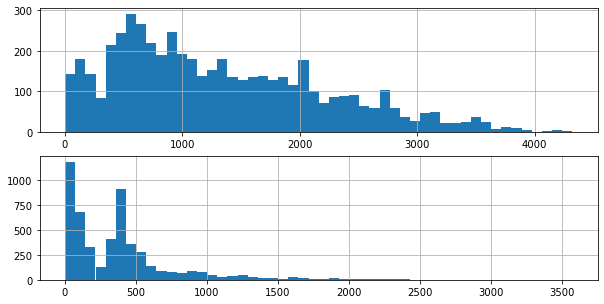

In [59]:
# distribution of since_first_review and since_last_review columns:

plt.subplot(2,1,1)
df.since_first_review.hist(figsize=(10,5), bins=50)
plt.subplot(2,1,2)
df.since_last_review.hist(figsize=(10,5), bins=50)
plt.show()

In [60]:
# creating bins for the since_first_review column
df.since_first_review = pd.cut(df.since_first_review, 
                               bins = [0,180,365,730,1460,max(df.since_first_review)], 
                               labels = ['0-6 months',
                                         '6-12 months',
                                         '1-2 years',
                                         '2-3 years',
                                         '4+ years'], include_lowest=True)

df.since_first_review = df.since_first_review.astype('str')
df.since_first_review.fillna('no_reviews',inplace=True)

In [61]:
# creating bins for the since_last_review column

df.since_last_review = pd.cut(df.since_last_review, 
                               bins = [0,14,60,180,365,max(df.since_last_review)], 
                               labels = ['0-2 weeks',
                                         '2-8 weeks',
                                         '2-6 months',
                                         '6-12 months',
                                         '1+ year'], include_lowest=True)

df.since_last_review = df.since_last_review.astype('str')
df.since_last_review.fillna('no_reviews',inplace=True)

In [62]:
#dropping the first_review and last_review columns
df.drop(['first_review','last_review'],axis=1,inplace=True)

**reviews**

Missing values in each reviews column is replaced with its median.
         

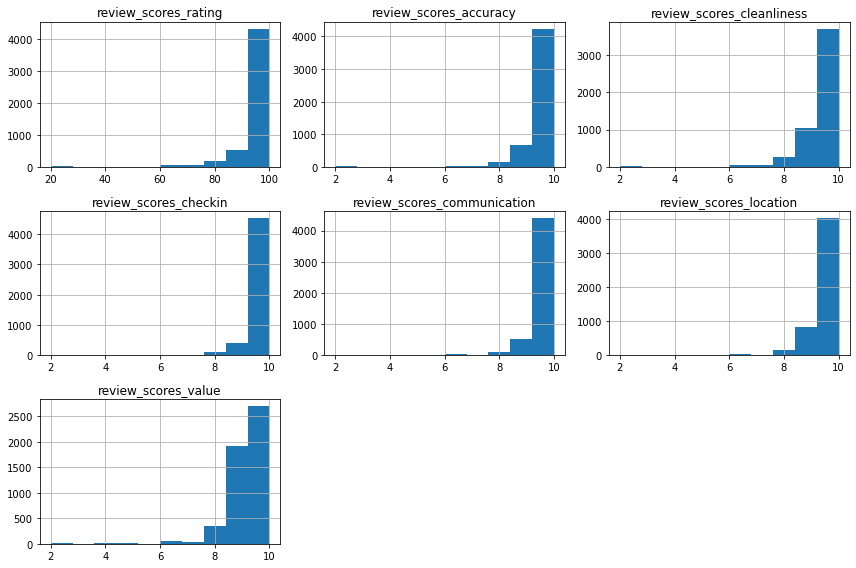

In [63]:

# Checking the distributions of the review ratings columns
variables_to_plot = list(df.columns[df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [64]:
# Bin into four categories
cols = ['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']

 
for i in cols:
    df[i] = pd.cut(df[i], bins=[0, 8, 9, 10], labels=['0-8', '9', '10'], include_lowest = True)
    df[i] = df[i].astype('str')
    df[i].fillna('no_reviews',inplace=True)

In [65]:
df.review_scores_rating = pd.cut(df.review_scores_rating, 
                               bins = [0, 80, 95, 100], 
                               labels = ['0-79', '80-94', '95-100'], include_lowest=True)
df.review_scores_rating = df.review_scores_rating.astype('str')
df.review_scores_rating.fillna('no_reviews',inplace=True)


In [66]:
# Getting a glance at the calendar data frame
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,958,2021-03-02,f,$130.00,$130.00,2,1125
1,53280,2021-03-02,f,$95.00,$95.00,3,60
2,53280,2021-03-03,f,$95.00,$95.00,3,60
3,53280,2021-03-04,f,$95.00,$95.00,3,60
4,53280,2021-03-05,f,$95.00,$95.00,3,60


In [67]:
# Looking at the data types of the columns.
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512295 entries, 0 to 2512294
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   listing_id      int64 
 1   date            object
 2   available       object
 3   price           object
 4   adjusted_price  object
 5   minimum_nights  int64 
 6   maximum_nights  int64 
dtypes: int64(3), object(4)
memory usage: 134.2+ MB


In [68]:
# Changing data type of date column to datetime
calendar['date'] = pd.to_datetime(calendar['date'])

In [69]:
# Checking the unique values in the available column.
calendar.available.unique()

array(['f', 't'], dtype=object)

In [70]:
# Mapping f and t in the available column to 0 and 1, respectively.
calendar.available = calendar.available.replace({'f':0,'t':1})

In [71]:
# Checking the unique values in the available column.
calendar.available.unique()

array([0, 1])

In [72]:
# Removing the '$' sign and ',' from the price and adjusted price columns and convert them to numeric type.
calendar['price'] = calendar['price'].str.replace(',','').str.replace('$','')
calendar['adjusted_price'] = calendar['adjusted_price'].str.replace(',','').str.replace('$','')
calendar.price = pd.to_numeric(calendar.price)
calendar.adjusted_price = pd.to_numeric(calendar.adjusted_price)

/Users/dagdasy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  
/Users/dagdasy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [73]:
# Checking the data types of the columns
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512295 entries, 0 to 2512294
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       int64         
 3   price           float64       
 4   adjusted_price  float64       
 5   minimum_nights  int64         
 6   maximum_nights  int64         
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 134.2 MB


In [74]:
# Saving the cleaned data into csv file.
calendar.to_csv(r'../data/clean/calendar_clean.csv', index = False, header=True)

In [75]:
# Saving the cleaned data into csv file.
df.to_csv(r'../data/clean/listings_clean_dummy_encoding.csv', index = False, header=True)

In [77]:
df.columns


Index(['host_id', 'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'property_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'price', 'minimum_nights', 'maximum_nights', 'availability_60',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'host_days_active', 'tv',
       'air_conditioning', 'balcony', 'bed_linen', 'coffee_machine',
       'cooking_basics', 'elevator', 'gym', 'parking', 'long_term_stays',
       'private_entrance', 'internet', 'outdoor_space', 'whi